<img src="Imagenes/FER2013.jpg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px; width: 1500px; height: 250px;">


*Imagen creada con inteligencia artificial y editada con Microsoft Paint*


## **INTRODUCCIÓN**

En este Jupyter Notebook se hará una visualización y un pequeño EDA del dataset “FER-2013”. Este dataset se empleará para entrenar el modelo que reconocerá   
la expresión facial. El significado del nombre "FER-2013" es: "Facial Expression Recognition 2013", o sea, "Reconocimiento de Expresiones Faciales 2013"    
y es un conjunto de datos utilizado para el reconocimiento de expresiones faciales. Fue introducido durante la competencia de Kaggle  
"Challenges in Representation Learning: Facial Expression Recognition Challenge" en 2013.



## **BIBLIOTECAS USADAS:**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from skimage.io import imread 
import cv2 
from PIL import Image 
import random

## **ETIQUETAS**

In [2]:

train_folder = os.path.join('datos/fer', 'train')
test_folder = os.path.join('datos/fer', 'test')

def get_labels_from_folders(folder):
    labels = os.listdir(folder)
    return labels
train_labels = get_labels_from_folders(train_folder)
test_labels = get_labels_from_folders(test_folder)

print("Las etiquetas para el Train son:", train_labels)
print()
print("Las etiquetas para el Test son:", test_labels)


Las etiquetas para el Train son: ['Asco', 'Enojo', 'Felicidad', 'Miedo', 'Neutral', 'Sorpresa', 'Tristeza']

Las etiquetas para el Test son: ['Asco', 'Enojo', 'Felicidad', 'Miedo', 'Neutral', 'Sorpresa', 'Tristeza']


>Las etiquetas las toma el programa del nombre de las carpetas donde las fotografías con las distintas expresiones faciales están guardadas.  
Originalmente estaban en inglés; cambiando el nombre de estas carpetas se cambia el nombre de las etiquetas.

## **TAMAÑO DEL DATASET**

In [3]:
carpeta_fer = "datos/fer"

# Listas para las carpetas "train" y "test"
carpetas = ["train", "test"]

# Recorremos cada carpeta ("train" y "test")
for carpeta in carpetas:
    print(f"Fotos en la carpeta {carpeta}")
    print("------------------------------")
    carpeta_path = os.path.join(carpeta_fer, carpeta)

    # Obtenemos la lista de subcarpetas dentro de "train" o "test"
    subcarpetas = next(os.walk(carpeta_path))[1]

    total_fotos = 0  # Variable para contar el total de fotos en la carpeta "train" o "test"

    # Recorremos cada subcarpeta
    for subcarpeta in subcarpetas:
        subcarpeta_path = os.path.join(carpeta_path, subcarpeta)
        
        # Contamos la cantidad de archivos (fotos) en la subcarpeta
        archivos = next(os.walk(subcarpeta_path))[2]
        cantidad_fotos = len(archivos)
        total_fotos += cantidad_fotos
        
        # Mostramos el nombre de la subcarpeta y la cantidad de fotos
        print(f"{subcarpeta}: {cantidad_fotos} fotos")
    
    # Mostramos el total de fotos en la carpeta "train" o "test"
    print(f"**{carpeta.capitalize()} tiene en total: {total_fotos} fotos")
    print()  # línea en blanco entre "train" y "test"



Fotos en la carpeta train
------------------------------
Asco: 436 fotos
Enojo: 3995 fotos
Felicidad: 7214 fotos
Miedo: 4097 fotos
Neutral: 4965 fotos
Sorpresa: 3171 fotos
Tristeza: 4830 fotos
**Train tiene en total: 28708 fotos

Fotos en la carpeta test
------------------------------
Asco: 111 fotos
Enojo: 958 fotos
Felicidad: 1774 fotos
Miedo: 1024 fotos
Neutral: 1233 fotos
Sorpresa: 831 fotos
Tristeza: 1247 fotos
**Test tiene en total: 7178 fotos



>Vemos que no está balanceado; esto será tenido en cuenta a la hora de hacer el modelo.

## **CARACTERÍSTICAS DE LAS IMAGENES**

In [4]:
sentimientos = ['Asco', 'Enojo', 'Felicidad', 'Miedo', 'Neutral', 'Sorpresa', 'Tristeza']

for sentimiento in sentimientos:
    carpeta_fer = f"datos/fer/train/{sentimiento}"   
    archivos = os.listdir(carpeta_fer)
    
    if archivos:
        primer_archivo = archivos[0]
        archivo_path = os.path.join(carpeta_fer, primer_archivo)

        imagen = Image.open(archivo_path)
        tamaño = imagen.size  
        modo = imagen.mode  # Modo exacto de la imagen (RGB, RGBA, L, etc.)
        canales = imagen.getbands()  # Obtener los canales de color
        
        print(f"Las fotografías de la carpeta '{sentimiento}' tienen las siguientes características:")
        print("-----------------------------------")  
        print(f"Tamaño: {tamaño[0]} x {tamaño[1]} píxeles")
        print(f"Modo de color: {modo}")
        print(f"Número de canales de color: {len(canales)}")
        print()
    else:
        print("No se encontraron imágenes en la carpeta especificada.")


Las fotografías de la carpeta 'Asco' tienen las siguientes características:
-----------------------------------
Tamaño: 48 x 48 píxeles
Modo de color: L
Número de canales de color: 1

Las fotografías de la carpeta 'Enojo' tienen las siguientes características:
-----------------------------------
Tamaño: 48 x 48 píxeles
Modo de color: L
Número de canales de color: 1

Las fotografías de la carpeta 'Felicidad' tienen las siguientes características:
-----------------------------------
Tamaño: 48 x 48 píxeles
Modo de color: L
Número de canales de color: 1

Las fotografías de la carpeta 'Miedo' tienen las siguientes características:
-----------------------------------
Tamaño: 48 x 48 píxeles
Modo de color: L
Número de canales de color: 1

Las fotografías de la carpeta 'Neutral' tienen las siguientes características:
-----------------------------------
Tamaño: 48 x 48 píxeles
Modo de color: L
Número de canales de color: 1

Las fotografías de la carpeta 'Sorpresa' tienen las siguientes caracte

> Las fotografías a color tienen 3 canales, en este caso hay solo 1 canal, lo que indica que es en blanco y negro. Esto además se corrobora por el modo de color, donde 'L' representa escala de grises.
> 
> Este código analiza únicamente la primera fotografía de cada carpeta en el conjunto de datos de entrenamiento ("Train"). El dataset "fer-2013" es ampliamente conocido, usado y probado, por lo que se espera que todas las imágenes tengan características similares.


## **VISUALIZACIÓN DE LAS IMAGENES**

Muestra de imágenes de entrenamiento para reconocer 'Asco':


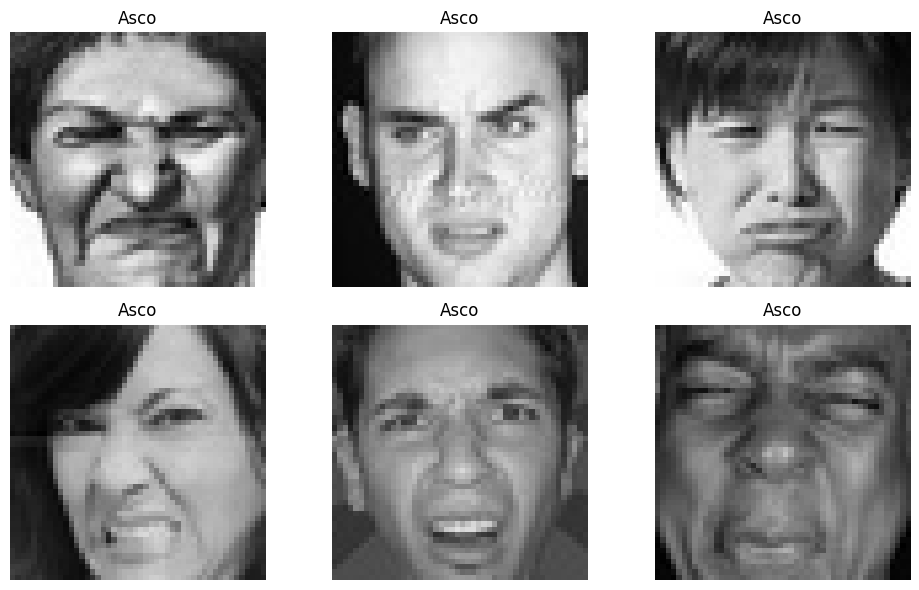

Muestra de imágenes de entrenamiento para reconocer 'Enojo':


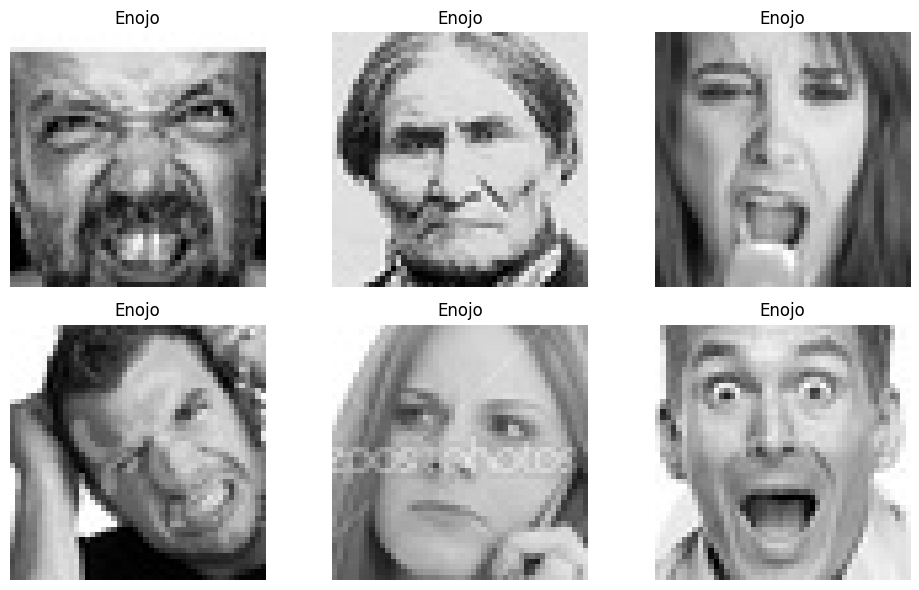

Muestra de imágenes de entrenamiento para reconocer 'Felicidad':


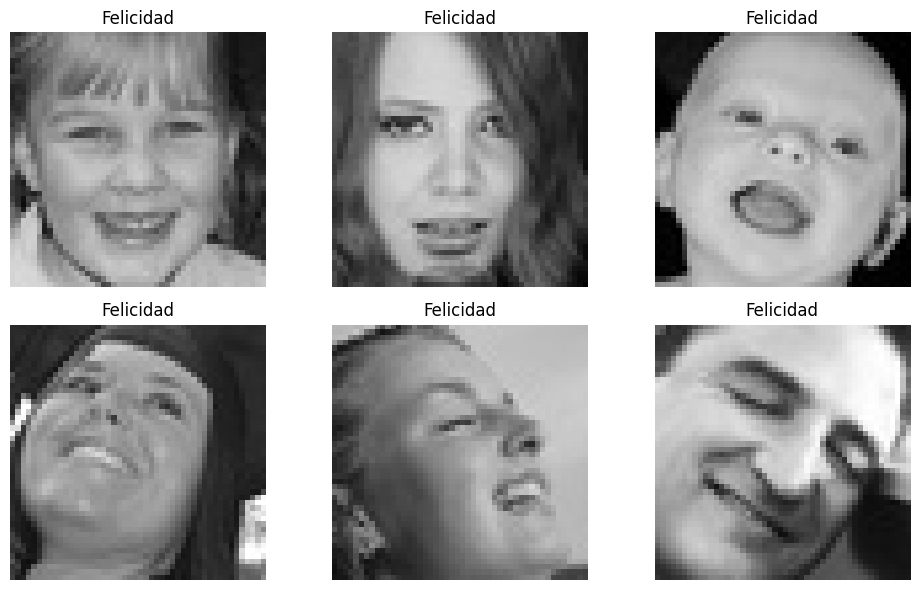

Muestra de imágenes de entrenamiento para reconocer 'Miedo':


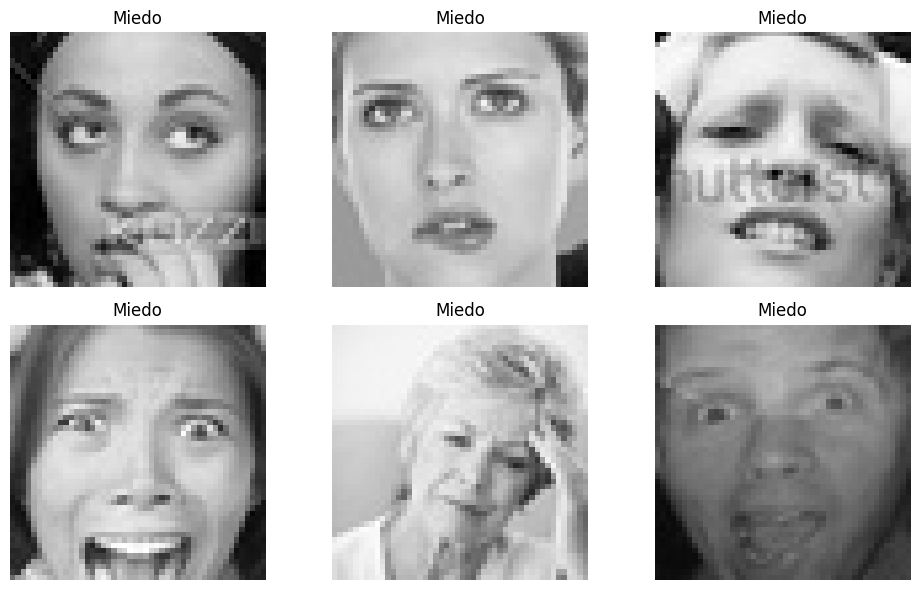

Muestra de imágenes de entrenamiento para reconocer 'Neutral':


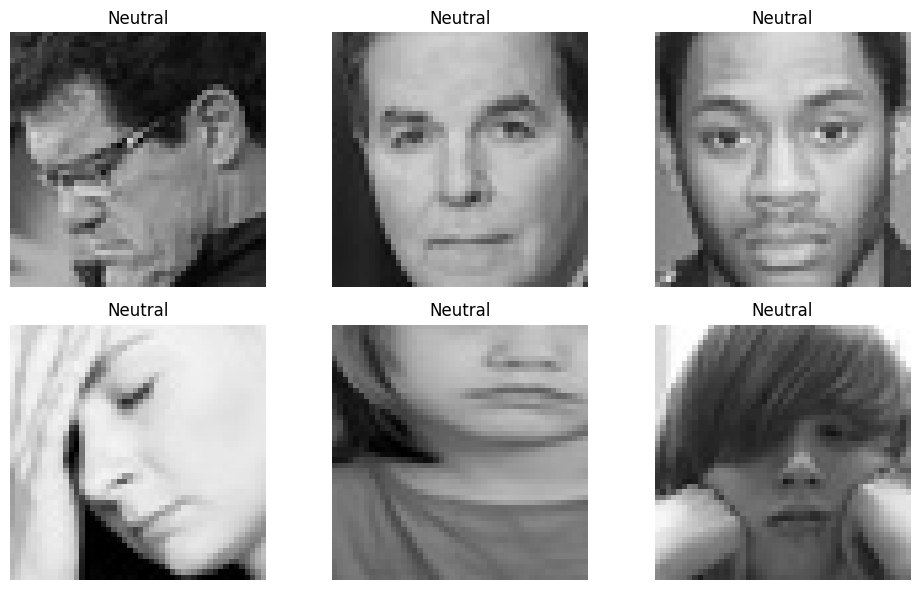

Muestra de imágenes de entrenamiento para reconocer 'Sorpresa':


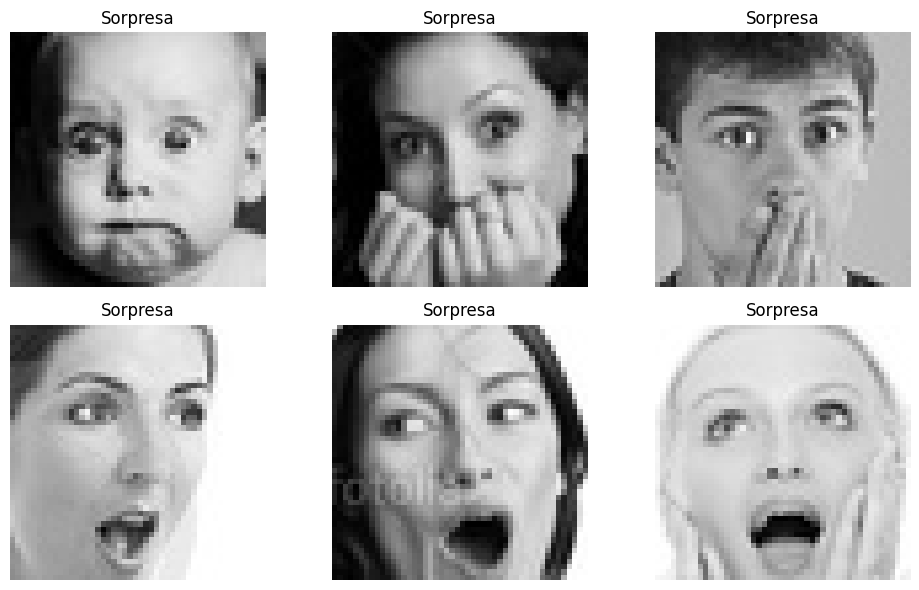

Muestra de imágenes de entrenamiento para reconocer 'Tristeza':


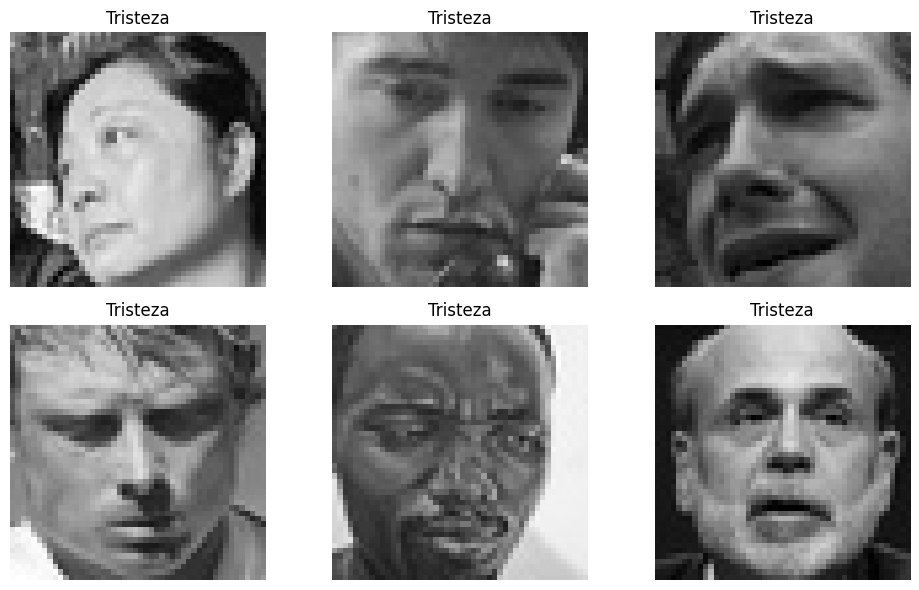

In [12]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Ruta a la carpeta que contiene las subcarpetas etiquetadas
carpeta_base = "datos/fer/train"
sentimientos = ['Asco', 'Enojo', 'Felicidad', 'Miedo', 'Neutral', 'Sorpresa', 'Tristeza']

# Función para obtener rutas aleatorias de imágenes en una carpeta específica
def obtener_rutas_aleatorias(carpeta, num_imagenes=6):
    archivos = os.listdir(carpeta)
    rutas = random.sample(archivos, num_imagenes)
    rutas_completas = [os.path.join(carpeta, archivo) for archivo in rutas]
    return rutas_completas

# Configuración de la visualización en 3 columnas y 2 filas
num_filas = 2
num_columnas = 3

# Tamaño deseado para mostrar las imágenes (en pulgadas)
ancho_imagen = 1.5
alto_imagen = 1.5

# Recorrer cada carpeta de sentimientos
for sentimiento in sentimientos:
    carpeta_actual = os.path.join(carpeta_base, sentimiento)
    if os.path.exists(carpeta_actual):
        print(f"Muestra de imágenes de entrenamiento para reconocer '{sentimiento}':")
        print("========================================================================================================================")
        
        # Obtener rutas aleatorias de imágenes
        rutas_imagenes = obtener_rutas_aleatorias(carpeta_actual)
        
        # Configurar la figura para mostrar las imágenes en una cuadrícula
        fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 6))
        
        # Mostrar cada imagen en una cuadrícula de 3x2
        for i, ruta in enumerate(rutas_imagenes):
            imagen = Image.open(ruta)
            etiqueta = sentimiento
            
            # Convertir imagen a escala de grises si es necesario
            if imagen.mode != 'RGB':
                imagen = imagen.convert('RGB')
            
            # Mostrar la imagen con tamaño personalizado
            axes[i // num_columnas, i % num_columnas].imshow(imagen, extent=[0, ancho_imagen, 0, alto_imagen])
            axes[i // num_columnas, i % num_columnas].set_title(etiqueta)
            axes[i // num_columnas, i % num_columnas].axis('off')  # Desactivar ejes
            
        plt.tight_layout()
        plt.show()
    else:
        print(f"No se encontraron imágenes en la carpeta '{sentimiento}'.")


## **CONCLISÓN FINAL**

Hacer un análisis exploratorio de datos, EDA, suele ser habitual en datos tabulares y que sean 'fácilmente' analizables.  
En el caso de un dataset de fotografías puede resultar algo más complejo. Sin embargo, explorar la cantidad de fotografías   
de cada etiqueta, el tamaño de estas, los canales y en general la aproximación que hemos hecho en este notebook puede ser   
suficiente para entender las características del dataset "FER-2013".  

Hemos examinado:
- Las etiquetas disponibles en el dataset.
- El tamaño del dataset, tanto para el conjunto de entrenamiento como para el conjunto de prueba.
- El tamaño y modo de color de las imágenes.
- Visualización de muestras aleatorias de imágenes de cada etiqueta.

Este análisis nos proporciona una idea inicial sobre la estructura y las características del dataset, preparándonos para entrenamiento   
de modelos de reconocimiento de expresiones faciales.

